In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_squared_error 

from scipy.stats import zscore, ttest_ind
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


In [33]:
data = pd.read_csv('games.csv')
meta1 = data['meta_score']
user1 = data['user_review']

In [26]:
#using min max formula
meta = meta1-0/100-0
user = user1-0/10-0

In [5]:
def meta_stats(data):
    mean = data.mean()
    median = data.median()
    var = data.var()
    std = data.std()
    occur = data.count()
    mode = data.mode().iloc[0]

    print(f"Statistics for Meta score are as folows :")
    print(f"Mean : {mean}")
    print(f"Median : {median}")
    print(f"Mode : {mode}")
    print(f"Occurences : {occur}")
    print(f"Variance : {var}")
    print(f"Standard Deviation : {std}")
meta_stats(data=meta1)

Statistics for Meta score are as folows :
Mean : 71.19965586464009
Median : 73.0
Mode : 80
Occurences : 17435
Variance : 149.10209922766938
Standard Deviation : 12.210737046864509


In [6]:
def pearson():
    summation = sum(ai * bi for ai, bi in zip(meta, user))
    mean_a = meta.mean()
    mean_b = user.mean()
    n = len(meta)
    part1 = n*mean_a*mean_b
    numerator = summation - part1
    std_a = meta.std()
    std_b = user.std()
    deno = (n-1)*std_a*std_b
    print("\n \nThe co-efficient is :", numerator/deno)
pearson()


 
The co-efficient is : 0.5262604881718033


In [7]:
def normal_meta():
    mean = meta1.mean()
    std = meta1.std()
    x = meta1.sample().values[0]
    pi = 3.14
    e = 2.71
    power = -1/2*((x - mean)/std)**2
    num = math.exp(e**power)
    sq = math.sqrt(2*pi)
    deno = std*sq
    print(f"Normal distribution value for meta score {x} is: {num/deno}")
normal_meta()

Normal distribution value for meta score 78 is: 0.07697717868988777


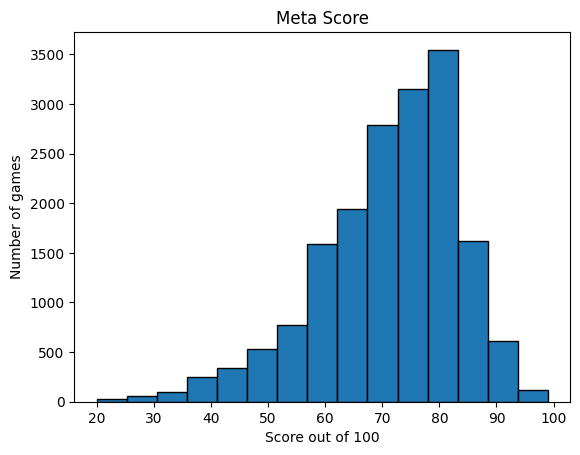

In [8]:
#! 1d histogram
plt.hist(meta1, bins = 15, edgecolor = 'black')
plt.xlabel('Score out of 100')
plt.ylabel('Number of games')
plt.title('Meta Score')
plt.show()

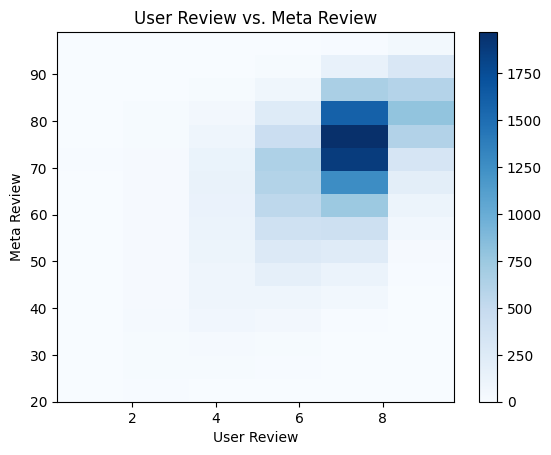

In [9]:
#! 2d Histogram
plt.hist2d(user1,meta1,bins=[6,16],cmap='Blues')
plt.xlabel('User Review')
plt.ylabel('Meta Review')
plt.title('User Review vs. Meta Review')
plt.colorbar()
plt.show()

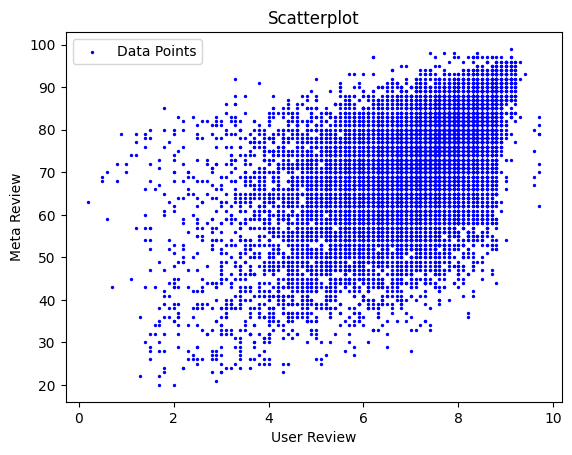

In [10]:
#! Scatterplot
plt.scatter(user1, meta1, label='Data Points', color='blue', marker='o',s=2)
plt.xlabel('User Review')
plt.ylabel('Meta Review')
plt.title('Scatterplot')
plt.legend()
plt.show()

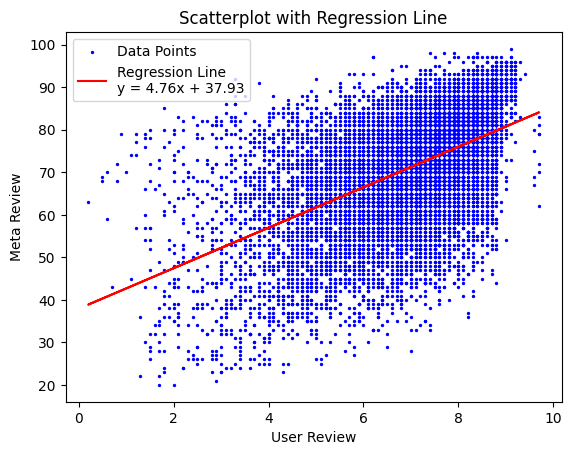

In [27]:
#! Regression line
plt.scatter(user1, meta1, label='Data Points', color='blue', marker='o',s=2)
model = LinearRegression()
X = user1.values.reshape(-1, 1)
y = meta1.values.reshape(-1, 1)
model.fit(X, y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]
predicted_review = model.predict(X)

plt.plot(user1, predicted_review, color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('User Review')
plt.ylabel('Meta Review')
plt.title('Scatterplot with Regression Line')
plt.legend()
plt.show()

In [30]:
X = data[['meta_score', 'user_review']]  # Feature columns
y = data['meta_score']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 10  # Choose an appropriate k
model = KNeighborsClassifier(n_neighbors=k)  # For classification
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.9922167771692131
Mean Squared Error: 0.010954165465552033


In [35]:
data['meta_score_z'] = zscore(data['meta_score'])
data['user_review_z'] = zscore(data['user_review'])

t_statistic, p_value = ttest_ind(data['meta_score_z'], data['user_review_z'])

print("T-Test for Meta Score (Standardized):")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


T-Test for Meta Score (Standardized):
T-Statistic: 3.1743071006411143e-14
P-Value: 0.9999999999999747


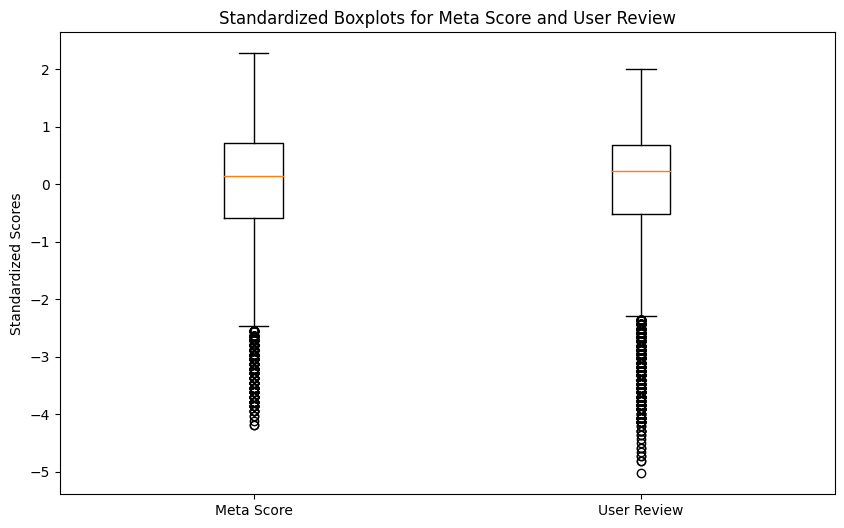

In [16]:
# Standardize the "meta_score" and "user_review" columns
scaler = StandardScaler()
data['meta_standardized'] = scaler.fit_transform(data[['meta_score']])
data['user_standardized'] = scaler.fit_transform(data[['user_review']])

# Specify a custom figsize for the plot
plt.figure(figsize=(10, 6))

# Create side-by-side boxplots for standardized "meta_score" and "user_review"
plt.boxplot([data['meta_standardized'], data['user_standardized']], labels=['Meta Score', 'User Review'])
plt.title('Standardized Boxplots for Meta Score and User Review')
plt.ylabel('Standardized Scores')

# Show the plot
plt.show()


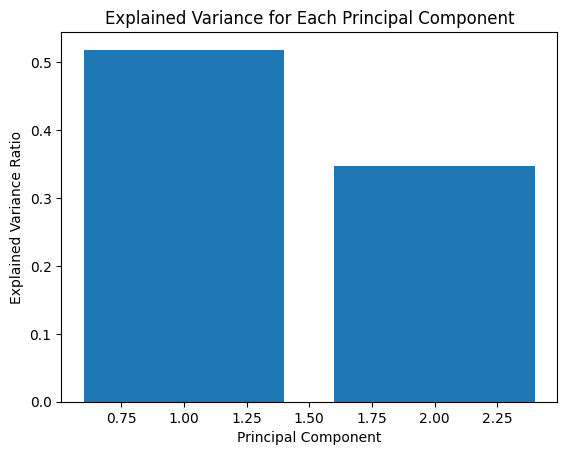

In [29]:
# Separate the features from the target variable if applicable
X = data.drop(['name','platform'], axis=1)  # Replace 'target' with your target column name

# Standardize the data to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA instance and specify the number of components
n_components = 2  # Choose the number of principal components
pca = PCA(n_components=n_components)

# Fit and transform the data to the first 'n_components' principal components
X_pca = pca.fit_transform(X_std)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Visualize the explained variance for each component
plt.bar(range(1, n_components + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Each Principal Component')
plt.show()
